In [167]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools

plt.rcParams['axes.linewidth'] = 3.0

rc_settings = {
        'figure.figsize': (10, 8),
        'figure.dpi': 100,
        'axes.linewidth': 3.0,
        'axes.edgecolor': 'black',
        'font.family': 'sans-serif',
        'axes.labelsize': 25,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'axes.titlesize': 25,
        'xtick.major.size': 7,
        'xtick.major.width': 3.0,
        'ytick.major.size': 7,
        'ytick.major.width': 3.0,
        'xtick.bottom': True,
        'ytick.left': True
    }

In [168]:
try:
    with open('./blur.txt', 'r') as file:
        data_array = np.genfromtxt(file,delimiter=' ')
except FileNotFoundError:
    print("Error: The file 'blur.txt' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

blur_array = np.copy(data_array)

In [169]:
def ps_func(x,y,sigma):
    return np.exp(-(x**2+y**2)/(2*sigma**2))

def deblur(blur_array,psf_array):
    epsilon = 1e-3
    
    b_ft = np.fft.rfft2(blur_array)
    f_ft = np.fft.rfft2(psf_array)
    a_ft = np.where(np.abs(f_ft) >= epsilon, b_ft / (f_ft), b_ft)
    sharpened_array = np.fft.irfft2(a_ft, s=blur_array.shape)
    return sharpened_array

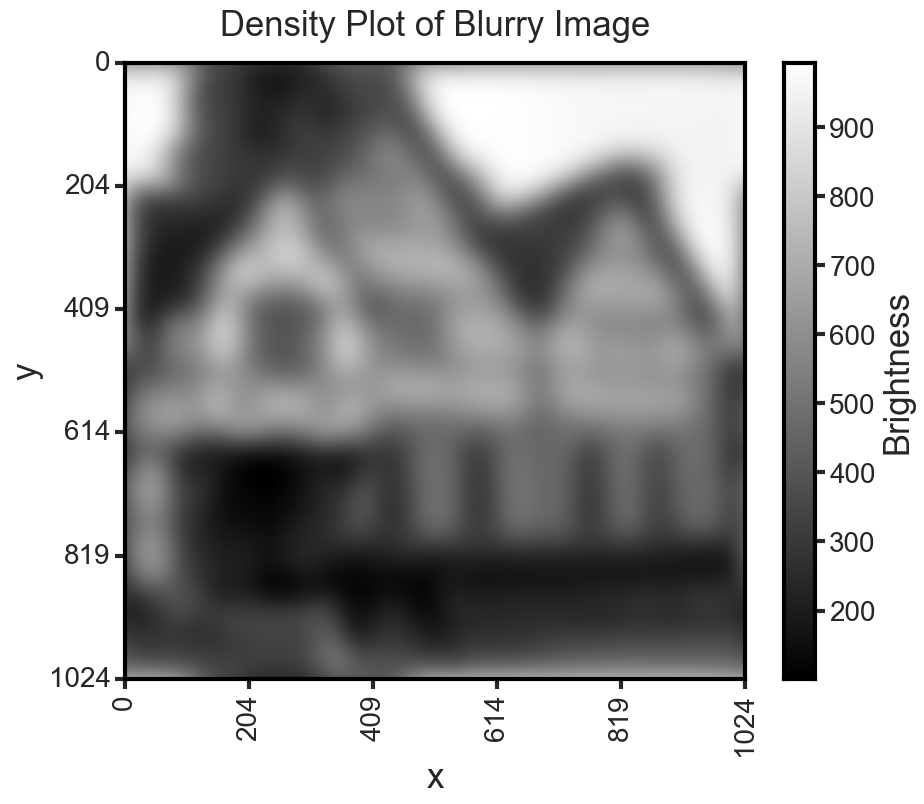

In [170]:
sns.set_theme(style = "whitegrid", rc = rc_settings)

y_dim, x_dim = blur_array.shape

ax = sns.heatmap(blur_array,cmap='grey',cbar_kws={'label': 'Brightness'})
num_ticks = 6
x_ticks = np.linspace(0, x_dim, num=num_ticks)
y_ticks = np.linspace(0, y_dim, num=num_ticks)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks.astype(int))
ax.set_yticklabels(y_ticks.astype(int))
sns.despine(top=False, right=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Density Plot of Blurry Image', pad=20)
plt.savefig('./hw3_p3_blurry_img.png',bbox_inches="tight")
plt.show()

In [171]:
# this cell prepares the point square function, centered at one of the corners, with 
# periodicity enforced by our choice of sampling

y_dim, x_dim = blur_array.shape
sigma=25

xrange = np.concatenate((
    np.linspace(0, int(x_dim/2)-1, int(x_dim/2)),
    np.linspace(-int(x_dim/2), -1, int(x_dim/2))
    ))
yrange = np.concatenate((
    np.linspace(0, int(y_dim/2)-1, int(y_dim/2)),
    np.linspace(-int(y_dim/2), -1, int(y_dim/2))
    ))

ps_grid = np.zeros((x_dim,y_dim))

for i, j in itertools.product(range(x_dim), range(y_dim)):
    ps_grid[i][j]=ps_func(xrange[i],yrange[j],sigma=sigma)

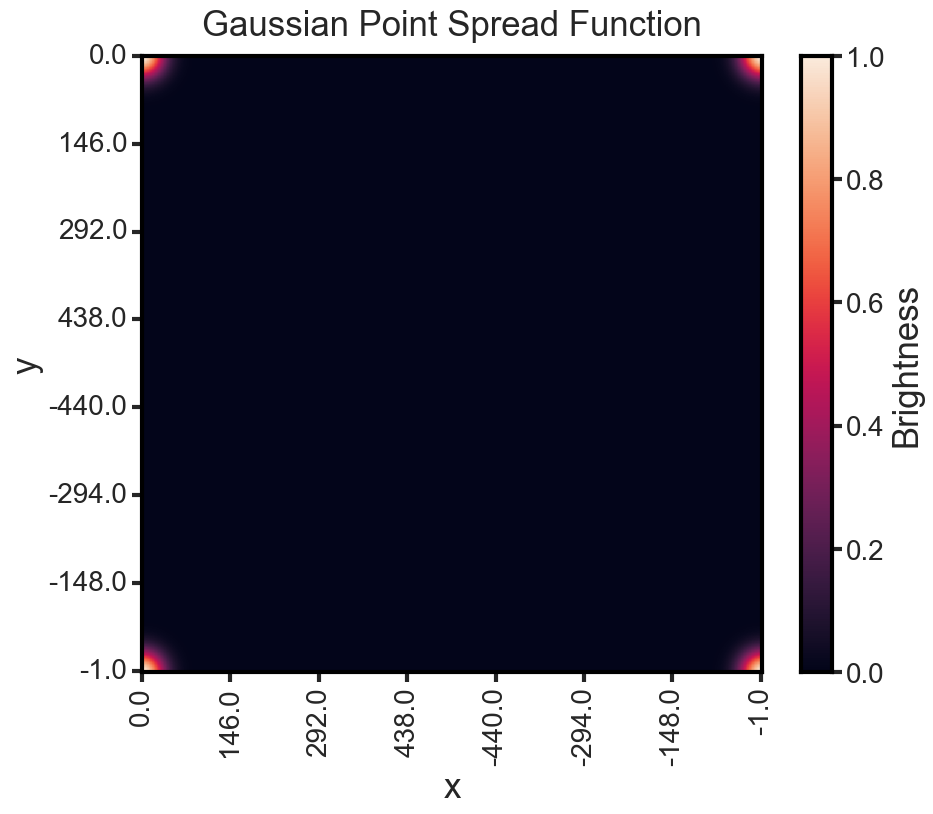

In [172]:
sns.set_theme(style = "whitegrid", rc = rc_settings)
num_ticks = 8
tick_indices = np.linspace(0, x_dim - 1, num_ticks).astype(int)
x_labels = xrange[tick_indices]
y_labels = yrange[tick_indices]
ax = sns.heatmap(ps_grid,cbar_kws={'label': 'Brightness'})
plt.xticks(ticks=tick_indices, labels=x_labels)
plt.yticks(ticks=tick_indices, labels=y_labels)
sns.despine(top=False, right=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gaussian Point Spread Function', pad=15)
plt.savefig('./hw3_p3_psf_periodic.png',bbox_inches="tight")
plt.show()

/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_11270/2828766104.py:9: RuntimeWarning: divide by zero encountered in divide
  a_ft = np.where(np.abs(f_ft) >= epsilon, b_ft / (f_ft), b_ft)
/var/folders/vc/d_yxpy3n0_l8fdjkn2_1vwpw0000gn/T/ipykernel_11270/2828766104.py:9: RuntimeWarning: invalid value encountered in divide
  a_ft = np.where(np.abs(f_ft) >= epsilon, b_ft / (f_ft), b_ft)


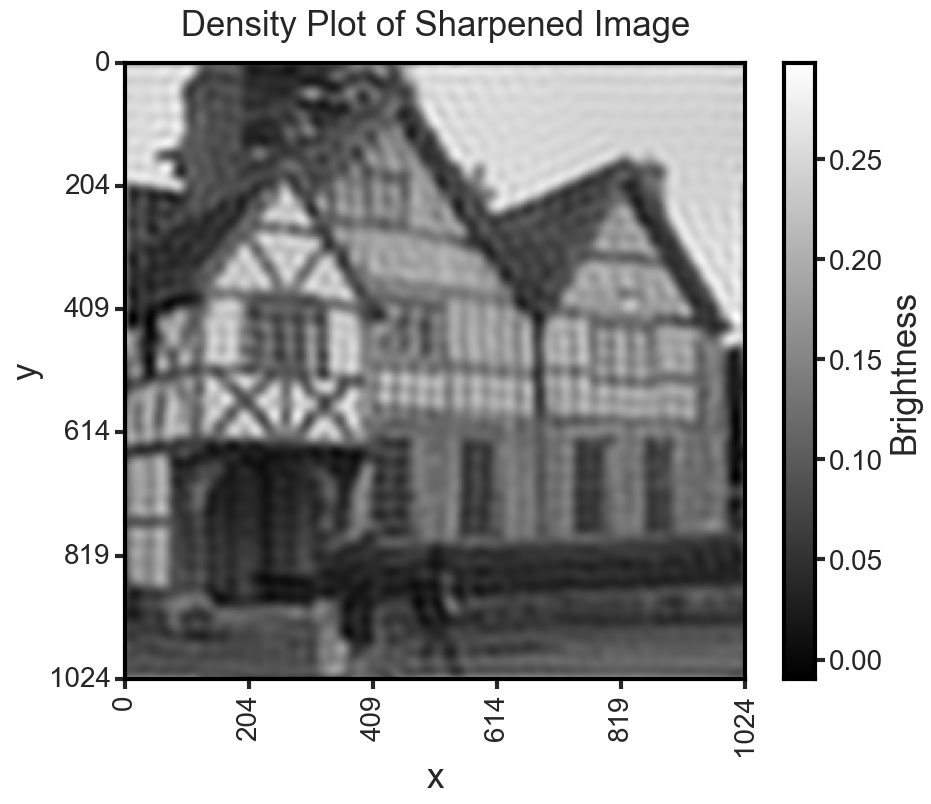

In [173]:
sharp_image=deblur(blur_array=blur_array,psf_array=ps_grid)

sns.set_theme(style = "whitegrid", rc = rc_settings)

ax = sns.heatmap(sharp_image,cmap='grey',cbar_kws={'label': 'Brightness'})

num_ticks = 6
x_ticks = np.linspace(0, x_dim, num=num_ticks)
y_ticks = np.linspace(0, y_dim, num=num_ticks)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks.astype(int))
ax.set_yticklabels(y_ticks.astype(int))
sns.despine(top=False, right=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Density Plot of Sharpened Image', pad=20)
plt.savefig('./hw3_p3_sharpened_img.png',bbox_inches="tight")
plt.show()